In [1]:
import os
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path
from shutil import copyfile
import tensorflow as tf

In [2]:
from keras_preprocessing.image import ImageDataGenerator

TARGET_SIZE = (150,100)
BATCH_SIZE = 64

TRAINING_DIR = r'D:\ML_BRAIT\dataset\train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      validation_split = 0.2,
      fill_mode='nearest')

TESTING_DIR = r'D:\ML_BRAIT\dataset\test'
testing_datagen = ImageDataGenerator(rescale=1./255)

VALIDATION_DIR = r'D:\ML_BRAIT\dataset\validation'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle=True
)

test_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 13171 images belonging to 35 classes.
Found 1648 images belonging to 35 classes.
Found 1628 images belonging to 35 classes.


In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x100 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    # Fully Connected Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 98, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 36, 23, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 21, 64)        1

In [4]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer= 'adam', 
              metrics=['accuracy'])

In [6]:
#callbacks=[MyCallback()]
#history = model.fit(train_generator,
                    #steps_per_epoch=128,
                    #epochs=20, 
                    #steps_per_epoch=len(train_generator), 
                    #validation_data = test_generator,
                    #validation_steps = 128,
                    #verbose = 2) 
                    #validation_steps=len(validation_generator),)

history = model.fit(train_generator, 
                    epochs=20, 
                    steps_per_epoch=len(train_generator), 
                    validation_data = validation_generator, 
                    verbose = 2, 
                    validation_steps=len(validation_generator)
)

Epoch 1/20


206/206 - 54s - loss: 3.3805 - accuracy: 0.0442 - val_loss: 3.4016 - val_accuracy: 0.0400 - 54s/epoch - 264ms/step
Epoch 2/20
206/206 - 56s - loss: 3.0443 - accuracy: 0.1672 - val_loss: 1.7515 - val_accuracy: 0.6329 - 56s/epoch - 273ms/step
Epoch 3/20
206/206 - 51s - loss: 0.7787 - accuracy: 0.8144 - val_loss: 0.4967 - val_accuracy: 0.9114 - 51s/epoch - 247ms/step
Epoch 4/20
206/206 - 56s - loss: 0.3584 - accuracy: 0.9143 - val_loss: 0.2994 - val_accuracy: 0.9466 - 56s/epoch - 272ms/step
Epoch 5/20
206/206 - 56s - loss: 0.2525 - accuracy: 0.9393 - val_loss: 0.2983 - val_accuracy: 0.9539 - 56s/epoch - 273ms/step
Epoch 6/20
206/206 - 54s - loss: 0.2159 - accuracy: 0.9464 - val_loss: 0.3243 - val_accuracy: 0.9527 - 54s/epoch - 261ms/step
Epoch 7/20
206/206 - 55s - loss: 0.1788 - accuracy: 0.9529 - val_loss: 0.2769 - val_accuracy: 0.9569 - 55s/epoch - 268ms/step
Epoch 8/20
206/206 - 58s - loss: 0.1382 - accuracy: 0.9629 - val_loss: 0.3475 - val_accuracy: 0.9478 - 58s/epoch - 2

In [7]:
history.history

{'loss': [3.3805315494537354,
  3.044341802597046,
  0.7787367701530457,
  0.3584376275539398,
  0.25254639983177185,
  0.215921550989151,
  0.17878805100917816,
  0.13824284076690674,
  0.16238363087177277,
  0.11341378092765808,
  0.10946030169725418,
  0.09186918288469315,
  0.08500736206769943,
  0.08893241733312607,
  0.08587837964296341,
  0.0759153813123703,
  0.08156213164329529,
  0.09132424741983414,
  0.06793227046728134,
  0.06377074122428894],
 'accuracy': [0.044187989085912704,
  0.1671854853630066,
  0.8144408464431763,
  0.9142813682556152,
  0.9393364191055298,
  0.9463973641395569,
  0.9528509378433228,
  0.9629489183425903,
  0.9579378962516785,
  0.9694024920463562,
  0.9697821140289307,
  0.9768430590629578,
  0.9755523204803467,
  0.9741857051849365,
  0.976615309715271,
  0.978057861328125,
  0.9788930416107178,
  0.9765393733978271,
  0.9820818305015564,
  0.9817022085189819],
 'val_loss': [3.401585817337036,
  1.751538634300232,
  0.4966830015182495,
  0.299427

In [8]:
model.evaluate(test_generator)

26/26 [==============================] - 5s 171ms/step - loss: 0.6667 - accuracy: 0.8827


[0.6667356491088867, 0.8826781511306763]

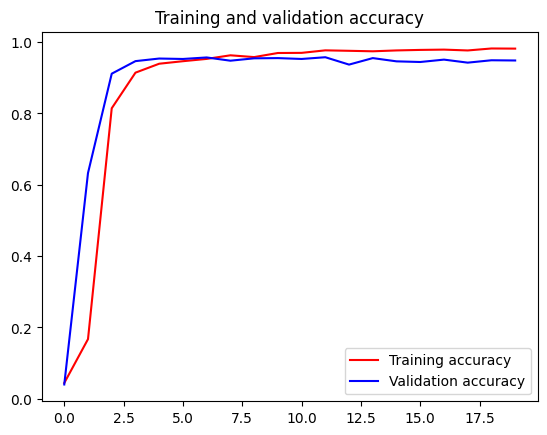

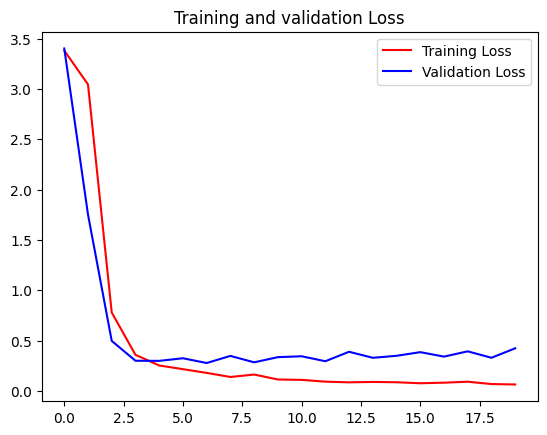

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [11]:
validation_generator.class_indices

{'a': 0,
 'b': 1,
 'c': 2,
 'colon': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'koma': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'petik_satu': 18,
 'q': 19,
 'r': 20,
 's': 21,
 'semicolon': 22,
 'space': 23,
 't': 24,
 'tanda_hubung': 25,
 'tanda_seru': 26,
 'tanda_tanya': 27,
 'titik': 28,
 'u': 29,
 'v': 30,
 'w': 31,
 'x': 32,
 'y': 33,
 'z': 34}

In [14]:
model.save("BRAIT.h5")

TESTING MODEL

In [65]:
#cek label
image_dir = Path(r'D:\ML_BRAIT\BRAIT-Machine-Learning\dataset\train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [66]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(2)

,Filepath,Label
0,D:\ML_BRAIT\BRAIT-Machine-Learning\dataset\tra...,f
1,D:\ML_BRAIT\BRAIT-Machine-Learning\dataset\tra...,j


In [61]:
#Shuffle
# Separate in train and test data
braille_train_df, braille_validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_28776\3778859768.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = braille_model.predict_generator(validation_generator)


Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

           a       0.02      0.02      0.02        61
           b       0.03      0.03      0.03        61
           c       0.03      0.03      0.03        78
       colon       0.00      0.00      0.00         6
           d       0.06      0.07      0.07        75
           e       0.05      0.06      0.05        71
           f       0.00      0.00      0.00        63
           g       0.08      0.08      0.08        64
           h       0.02      0.02      0.02        61
           i       0.02      0.02      0.02        61
           j       0.00      0.00      0.00        62
           k       0.02      0.02      0.02        62
        koma       0.00      0.00      0.00         5
           l       0.07      0.08      0.08        63
           m       0.07      0.08      0.08        62
           n       0.01      0.02      0.01        65
           o  

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

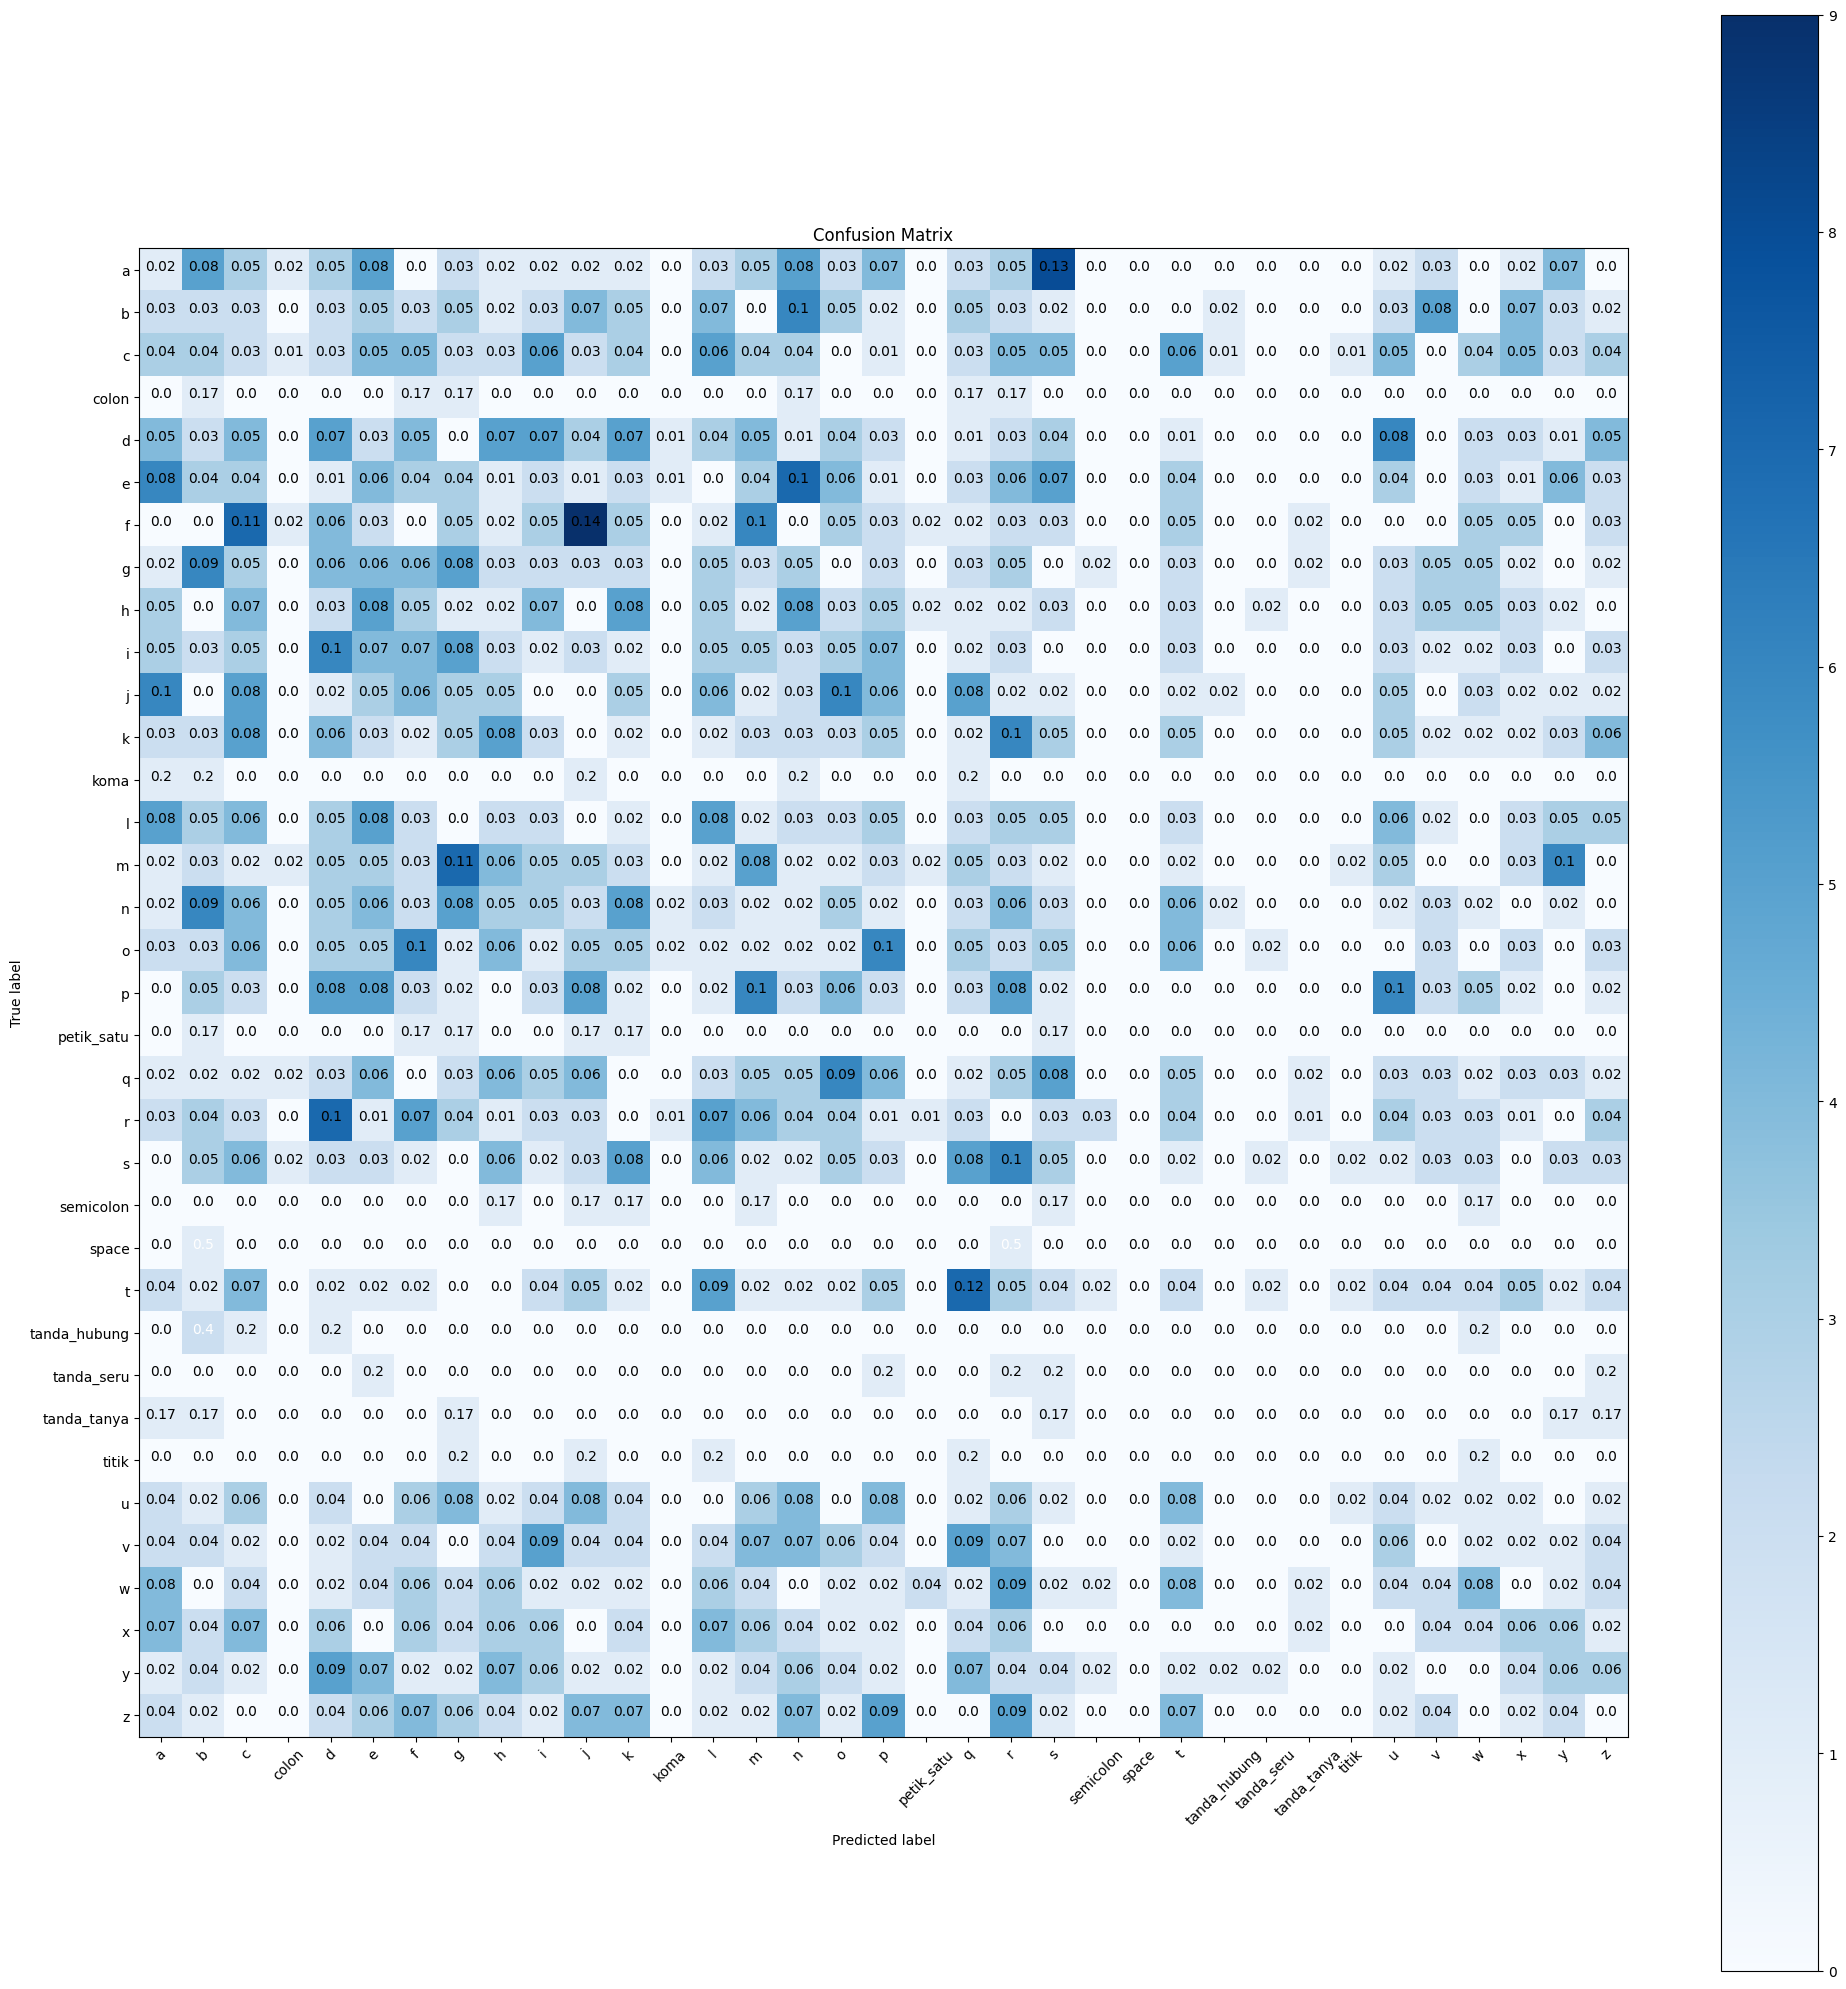

In [62]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in test_generator.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 

Y_pred = braille_model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [67]:
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model

braille_model = load_model(r'D:\ML_BRAIT\BRAIT-Machine-Learning\BRAIT.h5')

pred = braille_model.predict(validation_generator)
pred_classes = np.argmax(pred,axis=1)
pred_proba = np.max(pred, axis=1)

# Map the label
labels = (validation_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_classes = [labels[k] for k in pred_classes]

# Display the result
print(f'The first 15 predictions: {pred_classes[:15]}')

26/26 [==============================] - 2s 54ms/step
The first 15 predictions: ['x', 'u', 'l', 'u', 'r', 'y', 'd', 'b', 'b', 'l', 'g', 'g', 'r', 'l', 'b']


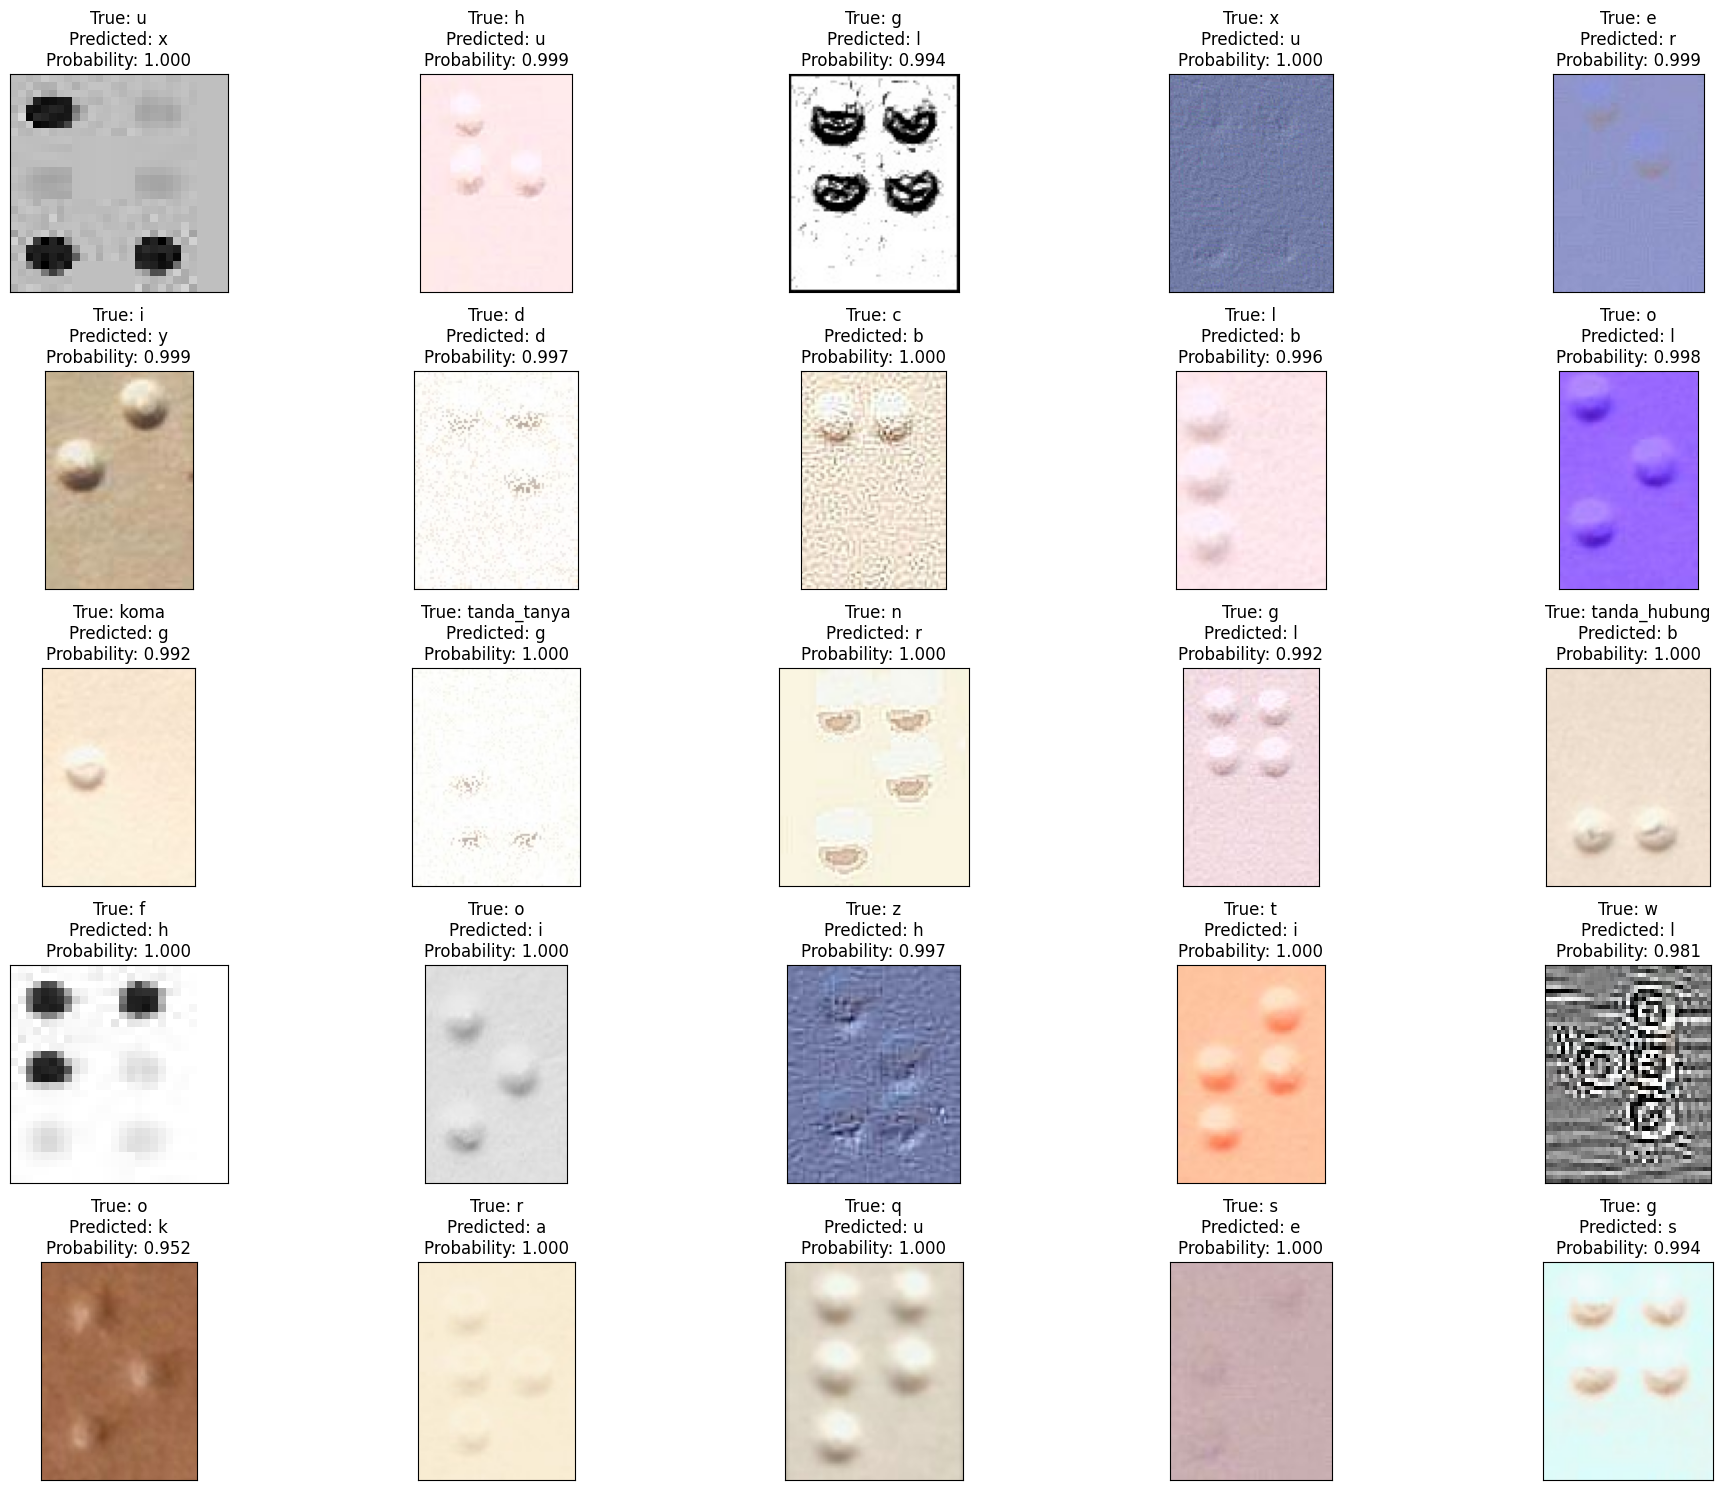

In [68]:
# Display the result
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(braille_validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {braille_validasi_df.Label.iloc[i]}\nPredicted: {pred_classes[i]}\nProbability: {pred_proba[i]:.3f}")
plt.tight_layout()
plt.show()